In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
from string import ascii_uppercase
from collections import Counter

In [ ]:
!wget https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/kundera.txt

--2023-07-08 00:00:04--  https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/kundera.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273 [text/plain]
Saving to: ‘kundera.txt.3’

kundera.txt.3       100%[===================>]     273  --.-KB/s    in 0s      

2023-07-08 00:00:04 (16.4 MB/s) - ‘kundera.txt.3’ saved [273/273]



In [ ]:
!cat kundera.txt

Chance and chance alone has a message for us. Chance and chance alone has a message for us. Everything that occurs out of necessity, everything expected, repeated day in and day out, is mute. Only chance can speak to us. We read its message much as gypsies read the images made by coffee grounds at the bottom of a cup.

Chance and chance alone has a message for us. Everything that occurs out of necessity, everything expected, repeated day in and day out, is mute. Only chance can speak to us. We read its message much as gypsies read the images made by coffee grounds at the bottom of a cup.


In [ ]:
file = open("kundera.txt")
texto = file.read()
file.close()
texto


'Chance and chance alone has a message for us. Chance and chance alone has a message for us. Everything that occurs out of necessity, everything expected, repeated day in and day out, is mute. Only chance can speak to us. We read its message much as gypsies read the images made by coffee grounds at the bottom of a cup.'

### Markov text generator

1. Preprocess text
  - Split text
  - Remove punctuation
  - Convert text to lower case

2. Explore your data
  - Unique words and frequency

3. Define states and transition matrix (this is the learning process)
  - Explore matrix
  - Explore state-transition diagram (text graph)

4. Test your generator

In [ ]:
words = texto.split()
words[:10]

['Chance',
 'and',
 'chance',
 'alone',
 'has',
 'a',
 'message',
 'for',
 'us.',
 'Chance']

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
table = str.maketrans('', '', string.punctuation)

words[8].translate(table)

'us'

In [ ]:
stripped = [w.translate(table) for w in words]
stripped

['Chance',
 'and',
 'chance',
 'alone',
 'has',
 'a',
 'message',
 'for',
 'us',
 'Chance',
 'and',
 'chance',
 'alone',
 'has',
 'a',
 'message',
 'for',
 'us',
 'Everything',
 'that',
 'occurs',
 'out',
 'of',
 'necessity',
 'everything',
 'expected',
 'repeated',
 'day',
 'in',
 'and',
 'day',
 'out',
 'is',
 'mute',
 'Only',
 'chance',
 'can',
 'speak',
 'to',
 'us',
 'We',
 'read',
 'its',
 'message',
 'much',
 'as',
 'gypsies',
 'read',
 'the',
 'images',
 'made',
 'by',
 'coffee',
 'grounds',
 'at',
 'the',
 'bottom',
 'of',
 'a',
 'cup']

In [ ]:
words_min = [w.lower() for w in stripped]
words_min

['chance',
 'and',
 'chance',
 'alone',
 'has',
 'a',
 'message',
 'for',
 'us',
 'chance',
 'and',
 'chance',
 'alone',
 'has',
 'a',
 'message',
 'for',
 'us',
 'everything',
 'that',
 'occurs',
 'out',
 'of',
 'necessity',
 'everything',
 'expected',
 'repeated',
 'day',
 'in',
 'and',
 'day',
 'out',
 'is',
 'mute',
 'only',
 'chance',
 'can',
 'speak',
 'to',
 'us',
 'we',
 'read',
 'its',
 'message',
 'much',
 'as',
 'gypsies',
 'read',
 'the',
 'images',
 'made',
 'by',
 'coffee',
 'grounds',
 'at',
 'the',
 'bottom',
 'of',
 'a',
 'cup']

39

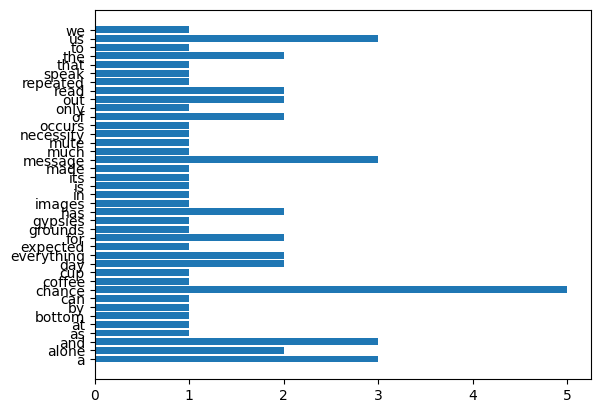

In [ ]:
w_unique, fw = np.unique(words_min, return_counts=True)
plt.barh(w_unique, fw)
len(w_unique)  # This are my states (unique words)

In [ ]:
# States
words_names = np.unique(words_min)

unique_words = len(words_names)

df = pd.DataFrame(np.zeros((unique_words, unique_words)), 
    columns=words_names, 
    index=words_names)
df

,a,alone,and,as,at,bottom,by,can,chance,coffee,...,only,out,read,repeated,speak,that,the,to,us,we
a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
as,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
at,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bottom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
by,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
can,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
coffee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

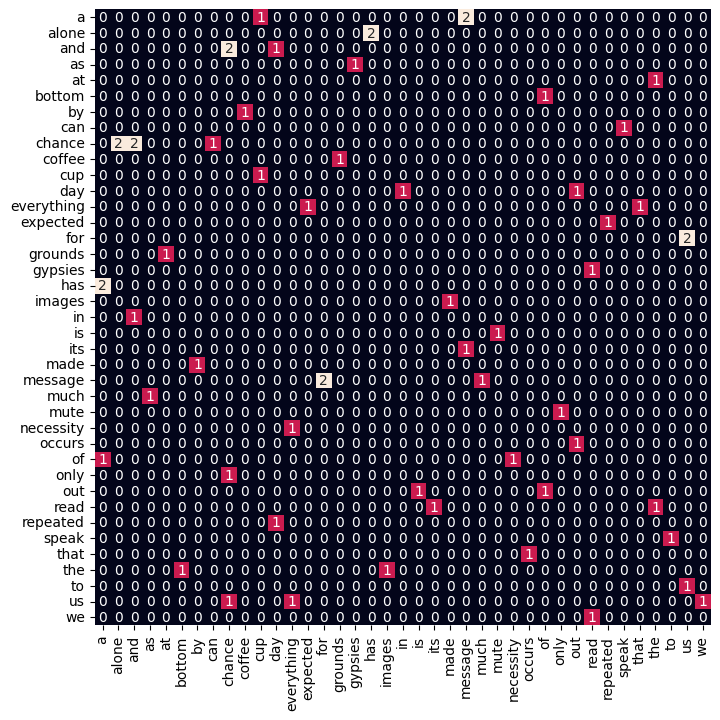

In [ ]:
# Now some reading (learning: build the probabilities in the transition matrix)
import seaborn as sns
df = pd.DataFrame(np.zeros((unique_words, unique_words)), 
    columns=words_names, 
    index=words_names)
    
for i in range(1, len(words_min)):
    col = words_min[i]
    row = words_min[i-1]
    df[col][row] += 1

df.loc['cup'] = 0
df['cup']['cup'] = 1
plt.figure(figsize=(8,8))
sns.heatmap(df, cbar=False, square=True, annot=True)

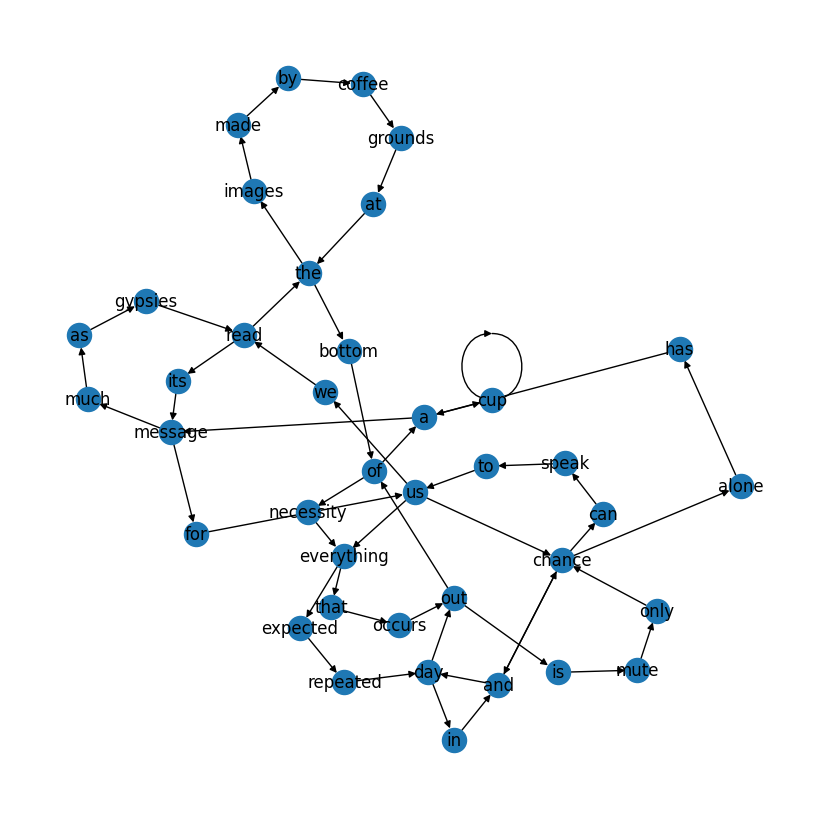

In [ ]:
import networkx as nx
G = nx.from_numpy_matrix(df.values, create_using=nx.DiGraph())
label_mapping = {idx: val for idx, val in enumerate(df.columns)}
G = nx.relabel_nodes(G, label_mapping)
plt.figure(figsize=(8,8))
nx.draw_kamada_kawai(G, with_labels=True)

<AxesSubplot:>

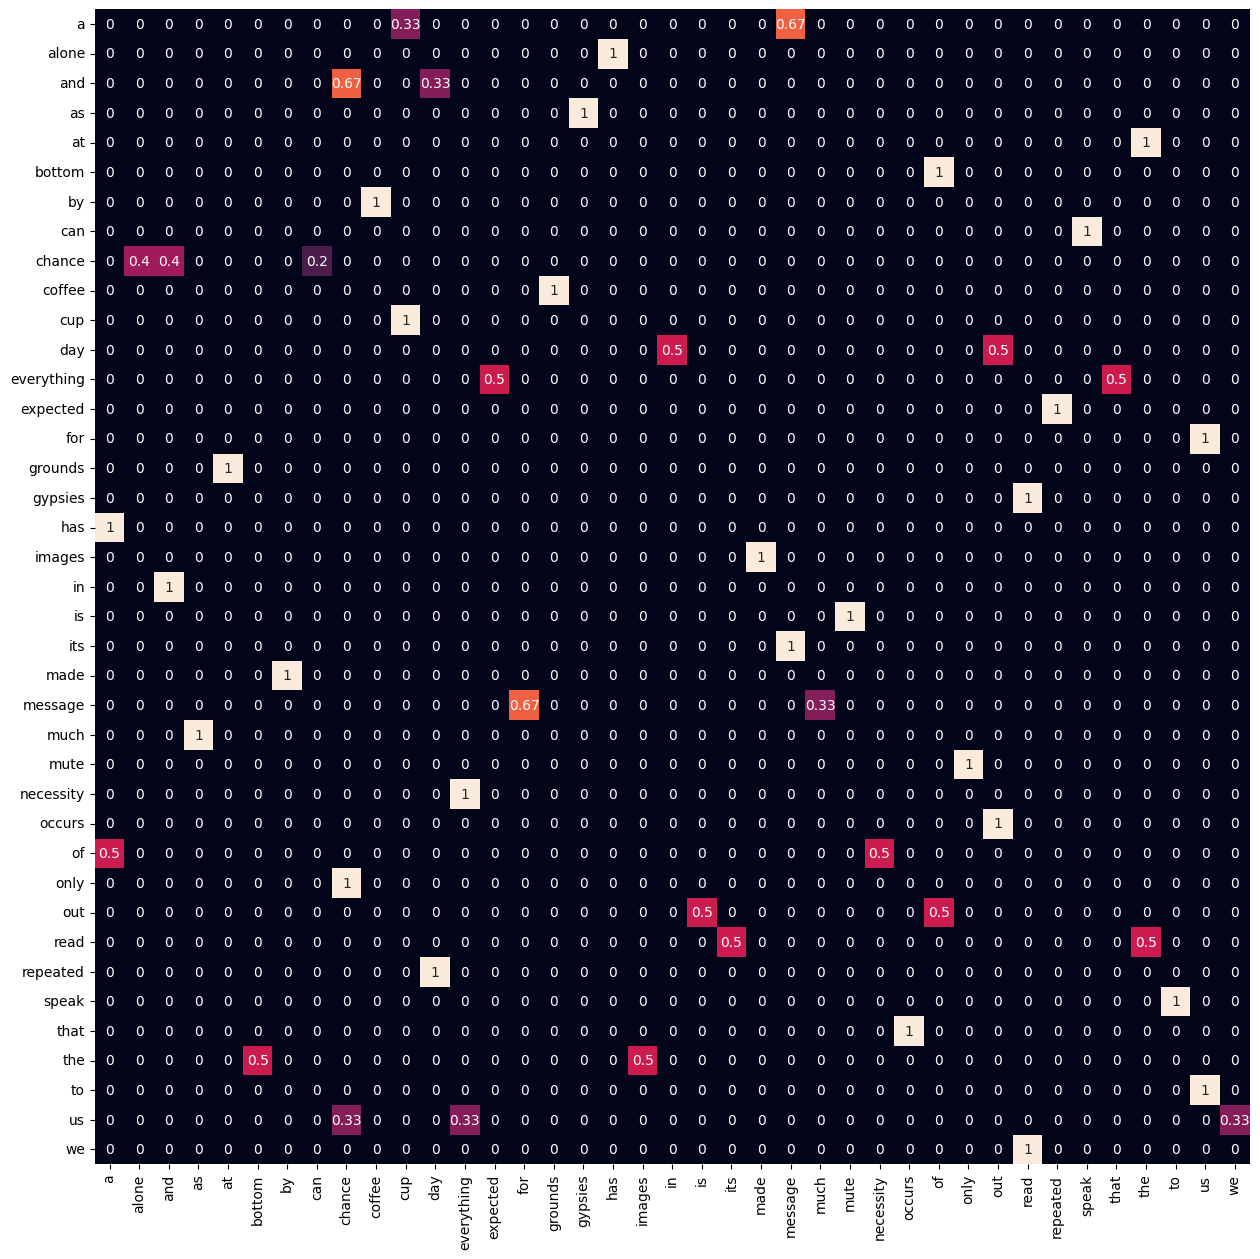

In [ ]:
df.loc[:,:] = df.loc[:,:].div(df.sum(axis=1), axis=0)
plt.figure(figsize=(15,15))
sns.heatmap(df, cbar=False, square=True, annot=True)

In [ ]:
def rw_graph(start, steps, states, df):
    walk = [start]
    for si in range(steps):
        p = df.loc[walk[-1], :]
        walk += [np.random.choice(states, p=p)]
        if walk[-1] == walk[-2]: break
    return walk[:-1]

for i in range(10):
    w = ' '.join(rw_graph('chance', 8, words_names, df))
    print(w)

chance alone has a message for us everything
chance can speak to us we read the
chance and chance and chance and day in
chance and chance and chance alone has a
chance and day out is mute only chance
chance can speak to us everything expected repeated
chance alone has a cup
chance and chance and day out of necessity
chance and chance alone has a message much
chance can speak to us chance can speak


### Resources

- https://github.com/Gr3gP/NLP-Projects/blob/main/Text_Generation_with_Markovify_Shakespeare.ipynb
- https://stats.stackexchange.com/questions/2457/markov-process-that-depends-on-present-state-and-past-state

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>